<center>
<div class="alert alert-block alert-info">
    <h1> </h1>
    <h1><font size="+3"> <b> Math340 HW10 </b> </font></h1>
    <h1><font size="+3"> <b> Programming in Mathematics </b> </font></h1>
    <h1><font size="+3"> <b> Due April 25, 2025 </b> </font></h1>
    
</div>
</center>

<br>



<center>
<font size="+2">
Department of Mathematics and Statistics <br> <br>
San Diego State University <br> <br>
Spring 2025
</font>
</center>








## Your Name: Meg Bucich

## Your ID: 131787276

## 1. Summary

(1) We were given an ODE and were asked to use Euler's method to solve it and graph it using various $\sigma \Delta t$ values.

(2) We used the U and V equations from a past homework and were asked to plot them, then to solve their derivatives using forward, backward, and centered difference schemes. We then plotted these six graphs along with plotting the growth rates of U using the provided equation and made a graph for each scheme graphed against a reference curve.

(3) skipped

(4) We were given a system of equations and were asked to solve it analytically, then introduce a small perturbation to the matrix entries and see how the solutions compared. 

(5) We were given a code with the resulting figures and were asked to discuss how multiple parts where calculated.

## 2. Methodology

(1) I wanted to create a for loop that would create all my graphs in one go since we had to create 6 of the same graphs with just changing the $\sigma \Delta t$ term. I did this by putting all my $\sigma \Delta t$ terms into a list to eventually iterate over. I also created an empty matrix with dimesion based on my length of t values and len of $\sigma \Delta t$ values. This matrix would hold the solutions to the ode since I wanted to use a loop to create all graphs at once. I had to iterate over the index of the $\sigma \Delta t$ terms. I made $x$ an empty list which would hold the y-values for each $\sigma \Delta t$ in one column. This made them easy to access when plotting. The loop would create these y-value solutions and plot them as we go. 

(2) Plotting the solutions to U and V were pretty straight forward. I got all my inital conditions from the prior homework and copied them over then just plotted them. To get the derivative graphs, I used the provided formulas to loop over the t-values since they are all recurisve. This was also pretty straight forward since we used similar recursive methods in past homeworks. I had to be a little careful on how I looped over the t-values based on which scheme I was implementing. I copied and pasted to do the same for V with a small variable change. Then I plotted these in a 2x3 panel and had corresponding colors for the schemes from U to V for visual clarity. To get the growth rates I was just plotting division of the derivatives I just calulated and the original function. This was also quite straight forward but had to be careful with my indexing because the graph looked weird. I had to play around a bit with the indexing so my graphs didn't have weird vertical lines (divison by zero). 

(3) skipped

(4) I decided to solve the system with numpy's linear algebra solving command but I guess thats technically a numerical solution so I also used sympy's linear algebra solving command to solve the system. I got the same answer either way. Then I introduced an epsilon number and added it to a few terms at random since it just said to introduce a perturbation. I used the same exact commands for the non-perturbed system. 

(5) no method used, just read the given code and used my context clues

## 3. Code and Results (e.g., Tables, Figures, Outputs)

### Results for Question 1

use $\frac{dX}{dt} = \sigma X(1-X)$ and Eulers Scheme

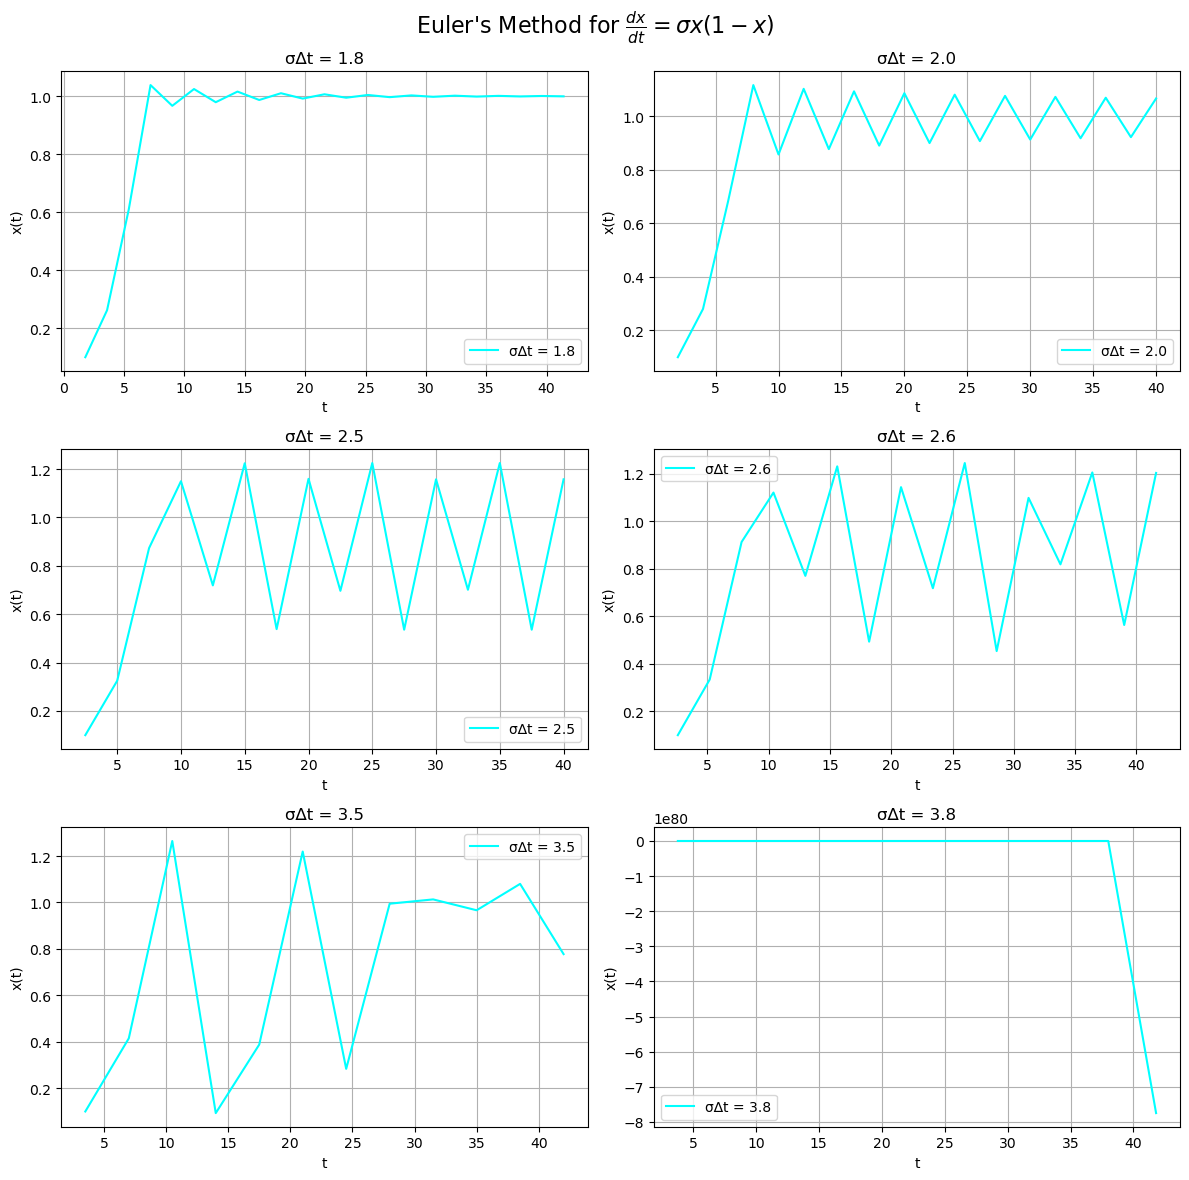

In [160]:
import numpy as np
import matplotlib.pyplot as plt
x_0 = 0.1
odt = [1.8, 2.0, 2.5, 2.6, 3.5, 3.8]
fig, axs = plt.subplots(3, 2, figsize=(12, 12))  
axs = axs.flatten() 
for idx, sigma_dt in enumerate(odt):
    dt = sigma_dt
    t = np.arange(0 + dt, 40 + dt, dt)  # time vector
    x = np.zeros(len(t))
    x[0] = x_0
    for j in range(1, len(t)):
        x[j] = x[j - 1] + sigma_dt * x[j - 1] * (1 - x[j - 1])
    axs[idx].plot(t, x, label=f'σ∆t = {sigma_dt}', color='cyan')
    axs[idx].set_xlabel('t')
    axs[idx].set_ylabel('x(t)')
    axs[idx].legend()
    axs[idx].grid()
    axs[idx].set_title(f'σ∆t = {sigma_dt}')

plt.suptitle(r"Euler's Method for $\frac{dx}{dt} = \sigma x(1 - x)$", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\megan\AppData\Local\Temp\ipykernel_38240\3999482790.py:10: RuntimeWarning: overflow encountered in scalar multiply
  x[j] = x[j-1] +  odt* x[j-1] * (1 - x[j-1])


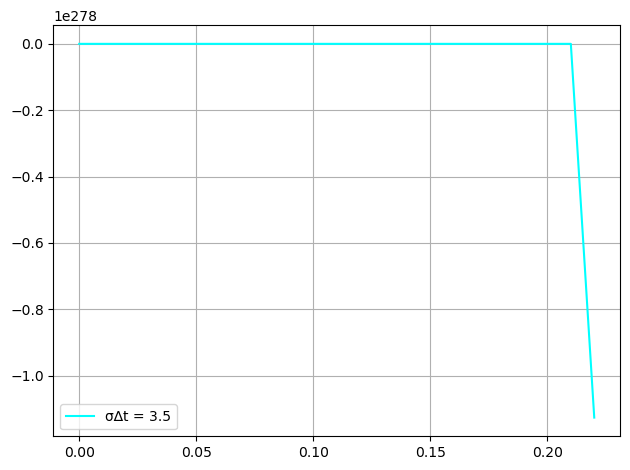

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_0 = 0.1
t = np.arange(0,40+.01,.01)
odt = 3.5
x = np.zeros(len(t))
x[0] = x_0
for j in range(1,len(t)):
    x[j] = x[j-1] +  odt* x[j-1] * (1 - x[j-1])
plt.plot(t, x, label=f'σ∆t = {odt}',color='cyan')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


### Results for Question 2

Simplified version of $U$: $$U = \frac{u_{0}e^{\sigma t}}{1-u_{0}+u_{0}e^{\sigma t}}$$ $$u_{0} = 0.002$$

Simplifed version of $V:$ $$V = \frac{v_{0}e^{\sigma t}}{1-v_{0}+v_{0}e^{\sigma t}}$$ $$v_{0} = u_{0} + \epsilon$$ $$\epsilon = .00001$$

apply the following finite difference schemes: $$ f^{'}_{n} \approx \frac{f_{n+1} - f_{n}}{\Delta t} $$ $$f^{'}_{n} \approx \frac{f_{n}-f_{n-1}}{\Delta t}$$ $$f^{'}_{n} \approx \frac{f_{n+1}-f_{n-1}}{2\Delta t}$$

### A: Generate a panel to display the solutions of U and V

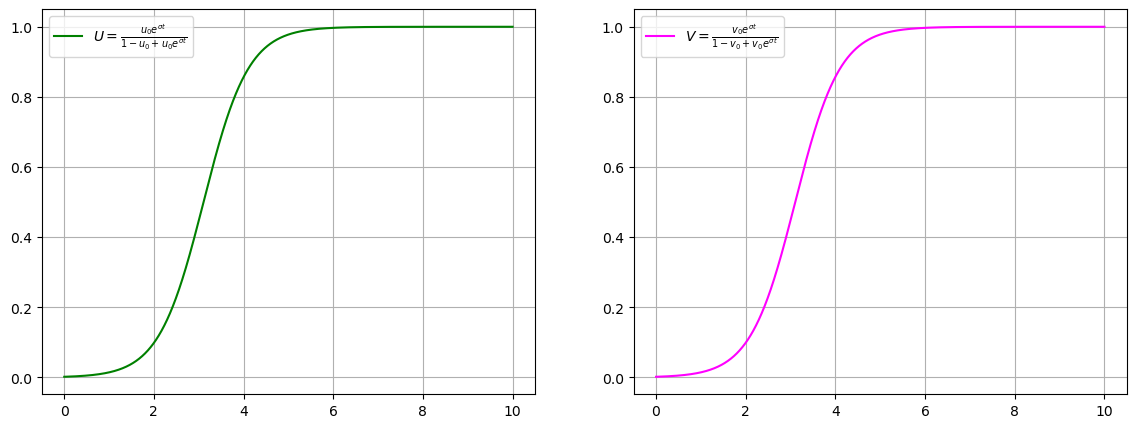

In [65]:
import numpy as np
import matplotlib.pyplot as plt
o = 2
dt = .001
t = np.arange(0+dt,10+dt,dt)
u0 = .002
eps = .00001
v0 = u0 + eps
U = (u0 * np.exp(o * t)) / (1 - u0 + u0 * np.exp(o * t))
V = (v0 * np.exp(o * t)) / (1 - v0 + v0 * np.exp(o * t))
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(t,U, label = r'$U = \frac{u_{0}e^{\sigma t}}{1-u_{0}+u_{0}e^{\sigma t}}$',color = 'green')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(t,V, label = r'$V = \frac{v_{0}e^{\sigma t}}{1-v_{0}+v_{0}e^{\sigma t}}$', color = 'magenta')
plt.grid()
plt.legend()

### B: Generate a panel to display three curves representing the numerical derivatives in Eqs (2.1) - (2.3)

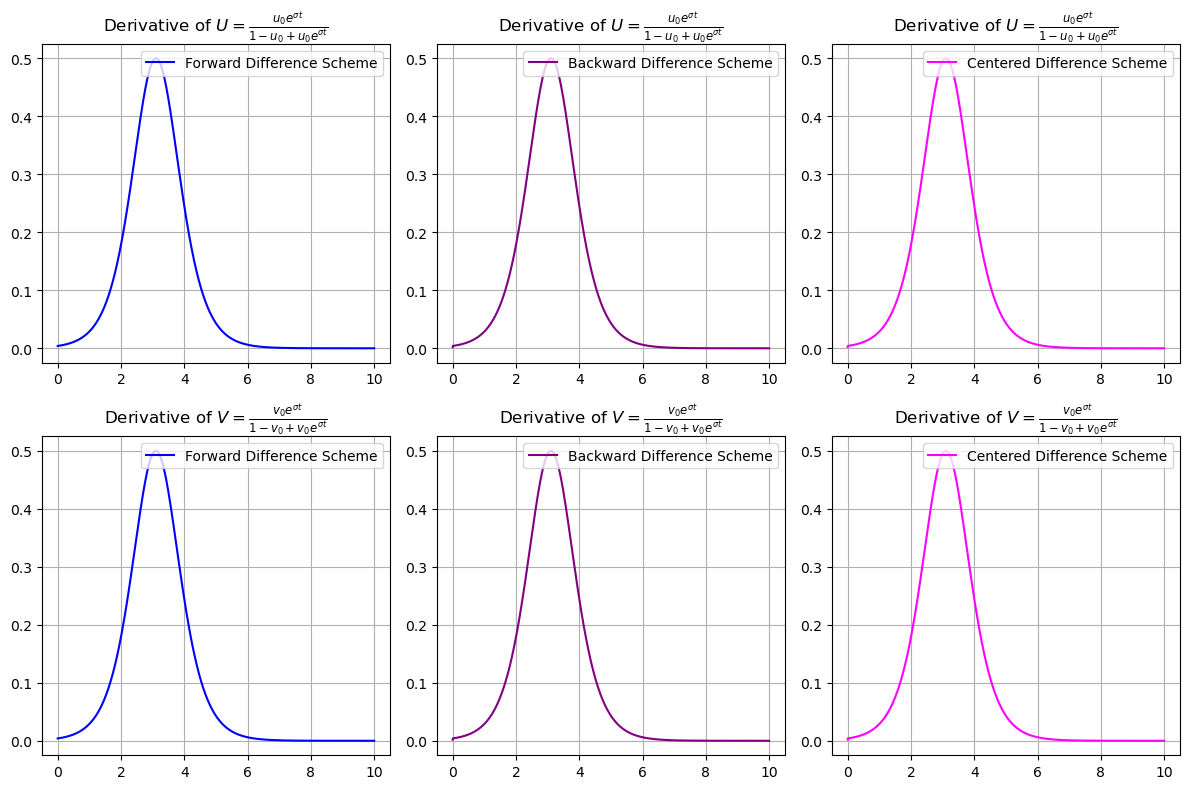

In [55]:
import numpy as np
import matplotlib.pyplot as plt
o = 2
dt = .001
t = np.arange(0+dt,10+dt,dt)
u0 = .002
eps = .00001
v0 = u0 + eps

# U forward
dudt_F = np.zeros(len(t))
dudt_F[0] = u0
U = (u0 * np.exp(o * t)) / (1 - u0 + u0 * np.exp(o * t))
for i in range(len(t)-1):
    dudt_F[i] = (U[i+1] - U[i]) / dt
    
# U backward
dudt_B = np.zeros(len(t))
dudt_B[0] = u0
for i in range(1,len(t)):
   dudt_B[i] = (U[i] - U[i-1]) / dt
    
# U centered
dudt_C = np.zeros(len(t))
dudt_C[0] = u0
for i in range(1,len(t)-1):
     dudt_C[i] = (U[i+1] - U[i-1]) / (2 * dt)

# V forward
V = (v0 * np.exp(o * t)) / (1 - v0 + v0 * np.exp(o * t))
dvdt_F = np.zeros(len(t))
dvdt_F[0] = v0
for i in range(len(t)-1):
    dvdt_F[i] = (V[i+1] - V[i]) / dt

# V backward
dvdt_B = np.zeros(len(t))
dvdt_B[0] = v0
for i in range(1,len(t)-1):
    dvdt_B[i] = (V[i] - V[i-1]) / dt

#V centered
dvdt_C = np.zeros(len(t))
dvdt_C[0] = v0
for i in range(1,len(t)-1):
    dvdt_C[i] = (V[i+1] - V[i-1]) / (2 * dt)

plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.plot(t,dudt_F,label = "Forward Difference Scheme",color = 'blue')
plt.title(r'Derivative of $U = \frac{u_{0}e^{\sigma t}}{1-u_{0}+u_{0}e^{\sigma t}}$')
plt.grid()
plt.legend(loc='upper right')

plt.subplot(2,3,2)
plt.plot(t,dudt_B,label = "Backward Difference Scheme",color = 'purple')
plt.title(r'Derivative of $U = \frac{u_{0}e^{\sigma t}}{1-u_{0}+u_{0}e^{\sigma t}}$')
plt.grid()
plt.legend(loc='upper right')

plt.subplot(2,3,3)
plt.plot(t,dudt_C,label = "Centered Difference Scheme",color='magenta')
plt.title(r'Derivative of $U = \frac{u_{0}e^{\sigma t}}{1-u_{0}+u_{0}e^{\sigma t}}$')
plt.grid()
plt.legend(loc='upper right')

plt.subplot(2,3,4)
plt.plot(t,dvdt_F,label = "Forward Difference Scheme",color = 'blue')
plt.title(r'Derivative of $V = \frac{v_{0}e^{\sigma t}}{1-v_{0}+v_{0}e^{\sigma t}}$')
plt.grid()
plt.legend(loc='upper right')

plt.subplot(2,3,5)
plt.plot(t,dvdt_B,label = "Backward Difference Scheme",color = 'purple')
plt.title(r'Derivative of $V = \frac{v_{0}e^{\sigma t}}{1-v_{0}+v_{0}e^{\sigma t}}$')
plt.grid()
plt.legend(loc='upper right')

plt.subplot(2,3,6)
plt.plot(t,dvdt_C,label = "Centered Difference Scheme",color = 'magenta')
plt.title(r'Derivative of $V = \frac{v_{0}e^{\sigma t}}{1-v_{0}+v_{0}e^{\sigma t}}$')
plt.grid()
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [70]:
print(len(t))
print(len(dudt_F))
print(len(dudt_B))
print(len(dudt_C))

10000
10000
10000
10000


### C: Create a panel for the relative growth rates of U using:
$$\frac{1}{U}\frac{dU}{dt} \approx \frac{U^{'}_{n}}{U_{n}}$$
-include a reference curve using ($1-U$) for comparison

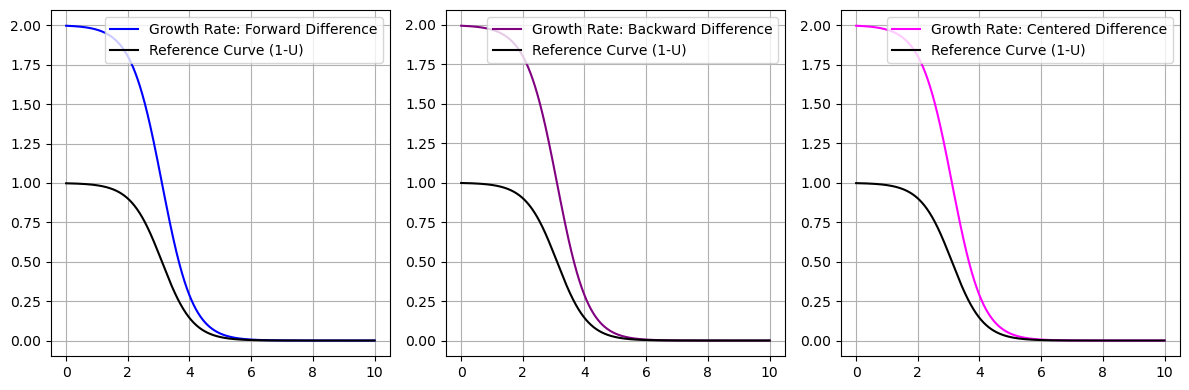

In [83]:
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
plt.plot(t[:-1], dudt_F[:-1] / U[:-1], label = 'Growth Rate: Forward Difference', color = 'blue')
plt.plot(t,1-U, label = "Reference Curve (1-U)", color = 'k') 
plt.grid()
plt.legend()


plt.subplot(1,3,2)
plt.plot(t[1:], dudt_B[1:] / U[1:], label = 'Growth Rate: Backward Difference',color = 'purple')
plt.plot(t,1-U, label = "Reference Curve (1-U)", color = 'k') 
plt.grid()
plt.legend()

plt.subplot(1,3,3)
plt.plot(t[1:-1], dudt_C[1:-1] / U[1:-1], label = 'Growth Rate: Centered Difference',color = 'magenta')
plt.plot(t,1-U, label = "Reference Curve (1-U)", color = 'k') 
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

### Results for Question 3

skipping

### Results for Question 4

(4.1):
$$.9999x - 1.0001y = 1 $$
(4.2):
$$x-y=1$$
(4.3):
$$AU = b$$

In [122]:
A = np.array([[.9999, -1.0001],[1,-1]])
b = np.array([1,1])
U_num = np.linalg.solve(A,b) #numerical 

import sympy as sp #analytical
x = sp.symbols('x')
y = sp.symbols('y')
A_ = sp.Matrix([[0.9999, -1.0001], [1, -1]])
b_ = sp.Matrix([1, 1])
U_analytical = sp.linsolve([A_,b_],x,y)
print('Numerical Soltution: ', U_num)
print('Analytical Solution: ', U_analytical)

Numerical Soltution:  [ 0.5 -0.5]
Analytical Solution:  {(0.5, -0.5)}


In [120]:
eps = .01
A = np.array([[.9999, -1.0001+eps],[1,-1]])
b = np.array([1+eps,1])
U_num = np.linalg.solve(A,b) #numerical 

import sympy as sp 
x,y = sp.symbols('x y')
A_ = sp.Matrix([[0.9999, -1.0001+eps], [1, -1]])
b_ = sp.Matrix([1+eps, 1])
U_analytical = sp.linsolve([A_,b_],x,y)
print('Numerical Soltution: ', U_num)
print('Analytical Solution: ', U_analytical)

Numerical Soltution:  [2.03061224 1.03061224]
Analytical Solution:  {(2.03061224489796, 1.03061224489796)}


### Results for Question 5

### (a): Discuss how Q, K, and V are constructed 

-$V$ is constructed by normalizing the RGB matrix column vectors. First all 7 colors were put into a matrix then were created into an array using numpy array command and used the list command. $V$ becomes the matrix of those vectors but all scaled by $\frac{1}{255}$
    
-$Q$ and $K$ are constructed from the "warm weights" and $V$. First an array was created with what are called warm weights. $Q$ and $K$ are the warm weights matrix mulitplied by the V matrix, which is the RBG matrix normalized. 

### (b): Discuss the step-by-step process of calculating:
    - similarity matrix 
    - attention scores
    - weighted sum

-The similarity matrix is matrix Q multiplied by the transpose of matrix K using numpy's dot product command. It is then scaled (division) by the magnitude of Q

-The attention scores are the softmax function applied to the scaled similarity matrix.

-The weighted sums are the dot product of the attention scores and the matrix V

### (c): Discuss the impact (on what??) of emphasizing warm colors in the Q and K matrices


-Looking at the weighted sums heat map, we see much darker squares in the red column and the squares get lighter as we move to green, then to blue, which makes sense because red is warm and green and blue are not.

Looking at the attention scores, the upper left quadrant of the heat map has the darkest squares since those are the scores when the warm colors are compared to each other. The rest of the map has much lighter squares with scores no larger than .15.

-The similarity matrix heat map has scores of almost zero when we deviate from the upper left quadrant, just like the attention scores map. The upper left has values of 2's,3's, and 4's.

-The Cosine similarity matrix has values of 0 when a warm color is compared with a cold color